In [1]:
from matplotlib import pyplot as plt

from genolearn.dataloader import DataLoader
from genolearn.metrics import intra_accuracy

import numpy as np

dataloader = DataLoader('data', 'raw-data/meta-data.csv', 'Accession', 'Region', 'Year')

train, test = dataloader.load_train_test_identifiers(range(2014, 2019), [2019])
Y_train     = dataloader.load_Y(*train)
Y_test      = dataloader.load_Y(*test)


regions    = list(dataloader.encoder)

npz     = np.load('script-output/logistic-regression.npz')

Y_hat   = dataloader.decode(npz['hats'])

colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

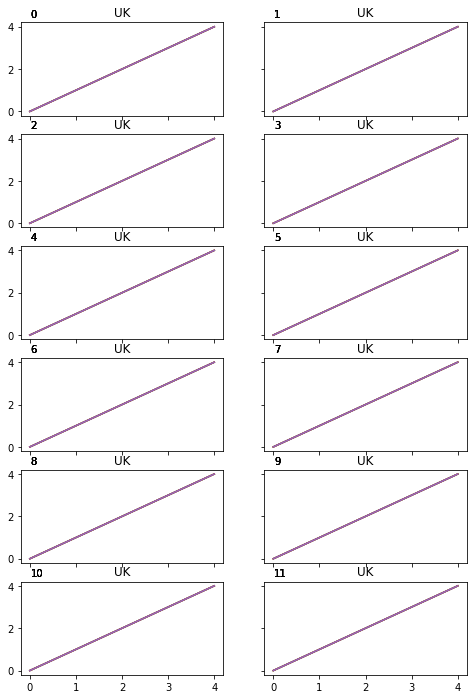

In [26]:
unique = ['Asia',
 'C. America',
 'C. Europe',
 'M. East',
 'N. Africa',
 'S. Europe',
 'Subsaharan Africa',
 'UK']

fig, ax = plt.subplots(6, 2, sharex = True, sharey = True, figsize = (8, 12))

ax      = ax.flatten()

for i, a in enumerate(ax):
    for k in range(5):
        a.plot(range(5))
        a.set_title(u)
        a.annotate(f'{i:,d}', (0.05, 1.06), xycoords = 'axes fraction', ha = 'left')

# for i, acc in enumerate(accs):
#     # for j, k in enumerate(npz['K']):
#     #     ax[i].semilogx(npz['C'], acc[j], c = colors[j], ls = ':', alpha = 0.3)
#     #     ax[i].semilogx(npz['C'], acc[j].mean(axis = -1), c = colors[j])
#     ax[i].set_title(regions[i])
#     train = Y_train == regions[i]
#     test  = Y_test  == regions[i]
#     ax[i].annotate(f'{train.sum():,d} ({train.mean():.1%})', (0.05, 1.06), xycoords = 'axes fraction', ha = 'left')
#     ax[i].annotate(f'{test .sum():,d} ({test .mean():.1%})', (0.95, 1.06), xycoords = 'axes fraction', ha = 'right')
#     ax[i].grid(ls = (0, (5, 5)))

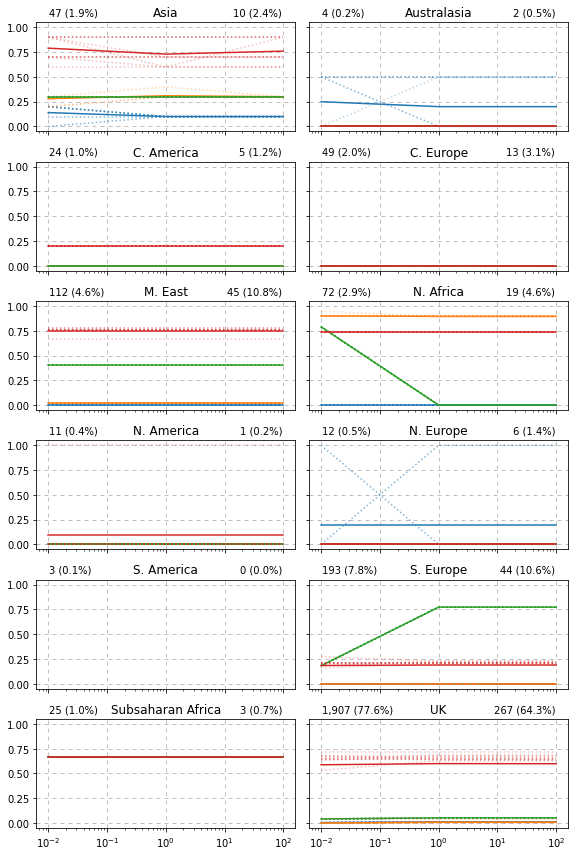

In [4]:
accs    = intra_accuracy(Y_test, Y_hat, regions)

fig, ax = plt.subplots(6, 2, sharex = True, sharey = True, figsize = (8, 12))

ax      = ax.flatten()

for i, acc in enumerate(accs):
    for j, k in enumerate(npz['K']):
        ax[i].semilogx(npz['C'], acc[j], c = colors[j], ls = ':', alpha = 0.3)
        ax[i].semilogx(npz['C'], acc[j].mean(axis = -1), c = colors[j])
    ax[i].set_title(regions[i])
    train = Y_train == regions[i]
    test  = Y_test  == regions[i]
    ax[i].annotate(f'{train.sum():,d} ({train.mean():.1%})', (0.05, 1.06), xycoords = 'axes fraction', ha = 'left')
    ax[i].annotate(f'{test .sum():,d} ({test .mean():.1%})', (0.95, 1.06), xycoords = 'axes fraction', ha = 'right')
    ax[i].grid(ls = (0, (5, 5)))

plt.tight_layout()
# plt.savefig('outputs/intra-accuracies.png', dpi = 300)

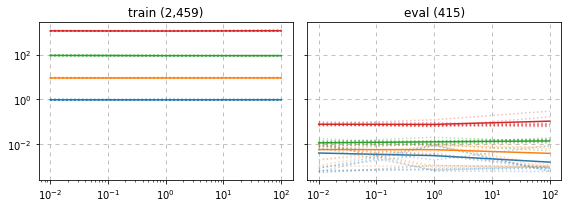

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3), sharey = True)

for t, title in enumerate([f'train ({len(Y_train):,d})', f'eval ({len(Y_test):,d})']):
    for j, k in enumerate(npz['K']):
        ax[t].loglog(npz['C'], npz['times'][j,...,t], c = colors[j], ls = ':', alpha = 0.3)
        ax[t].loglog(npz['C'], npz['times'][j,...,t].mean(axis = -1), c = colors[j])
    ax[t].grid(ls = (0, (5, 5)))
    ax[t].set_title(title)

plt.tight_layout()
# plt.savefig('outputs/times.png', dpi = 300)